# Emukit tutorials on experimental design

## Load default libraries

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [13]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)
import matplotlib.pyplot as plt

## Make a Latin Hypercuber

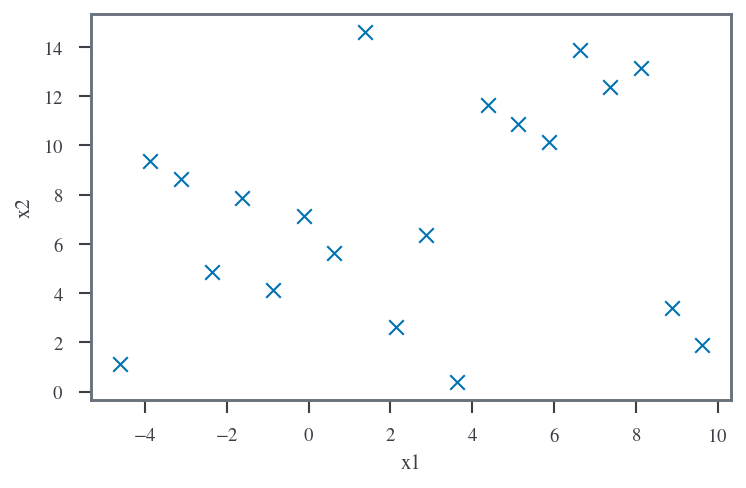

In [19]:
from emukit.core import ParameterSpace, ContinuousParameter
from emukit.core.initial_designs.latin_design import LatinDesign

parameter_space = ParameterSpace(
    [ContinuousParameter("x1", -5, 10), ContinuousParameter("x2", 0, 15)]
)
design = LatinDesign(parameter_space) 
num_data_points = 20
X = design.get_samples(num_data_points)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Sobol Sequence equivalent

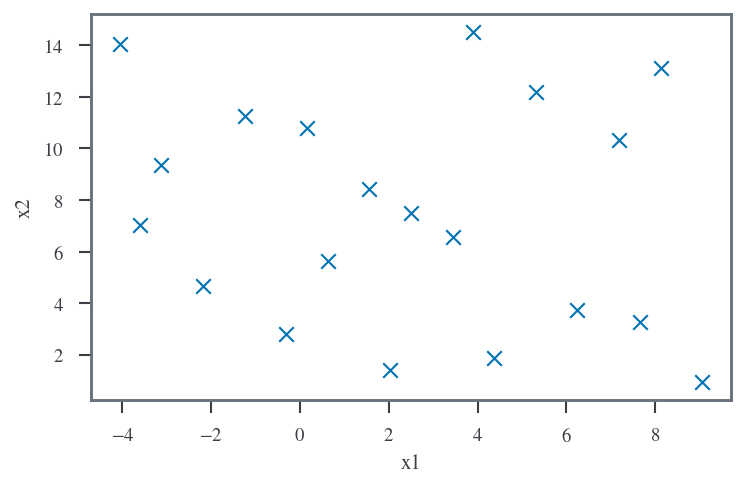

In [23]:
from emukit.core.initial_designs.sobol_design import SobolDesign

design = SobolDesign(parameter_space) 
X1 = design.get_samples(num_data_points)
plt.scatter(X1[:, 0], X1[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Emukit test function

In [20]:
from emukit.test_functions import branin_function

f, _ = branin_function()

## Model selected data points as a Gaussian Process

In [6]:
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

Y = f(X)
model_gpy = GPRegression(X, Y)
model_emukit = GPyModelWrapper(model_gpy)

## Look at Gaussian Process variance

In [8]:
from emukit.experimental_design.acquisitions import ModelVariance

model_variance = ModelVariance(model=model_emukit)

Text(0, 0.5, 'cov')

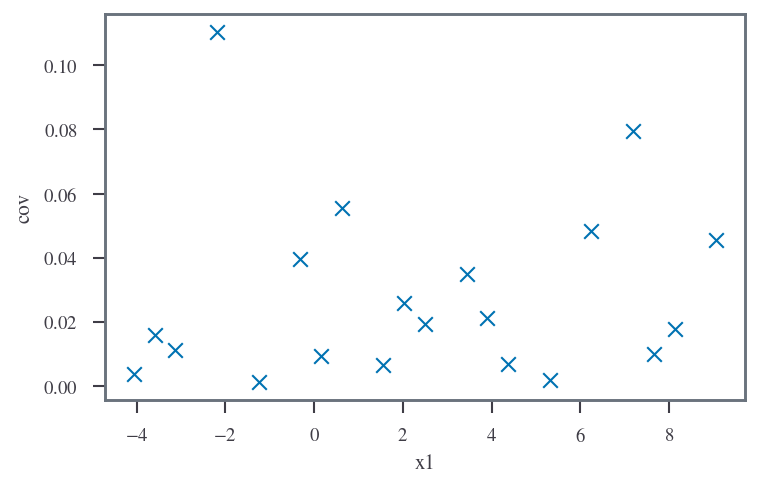

In [47]:
x = X1[:, 0]
_, y_cov = model_variance.model.predict(X1)
plt.scatter(X1[:, 0], y_cov, marker="x")
plt.xlabel("x1")
plt.ylabel("cov")

## Set-up experimental design loop

In [24]:
from emukit.experimental_design import ExperimentalDesignLoop

expdesign_loop = ExperimentalDesignLoop(
    model=model_emukit, space=parameter_space, acquisition=model_variance, batch_size=5
)

In [50]:
ExperimentalDesignLoop?

In [51]:
ps_defaults?